# About
* explore the maths behind linear regression and how its implemented 

# What is Linear Regression?
* Linear regression is a statistical method of finding the relationship between independent and dependent variables. 
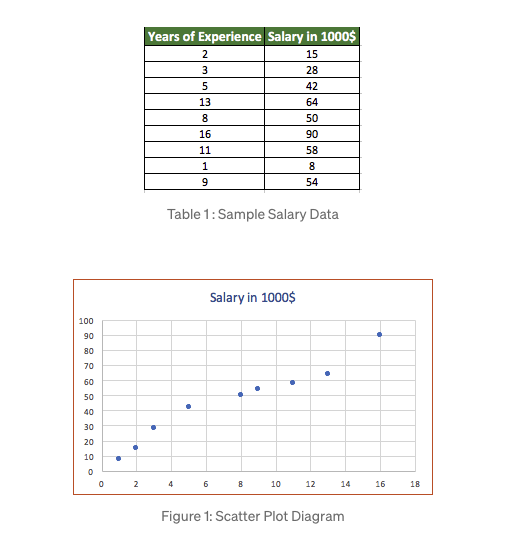

* Say we want to deduce the relationship between experience and salary
* We posit that experience results in a change in salary 
    * Independent variable - what we change (i.e. different levels of experience)
        * Our independent variables are independent because we cannot mathematically determine the years of experience. 
    * Dependent variable - what we observed in response to these changes (i.e.) salary
        *  But, we can determine / predict salary column values based on years of experience
        
# How do we fit a line between the points in a scatter plot?
## Sum of Squared Errors (SSE)
* SSE is a metric that we can use to compare different lines, the best fit being the one with the least error
    * the errors are the sum difference between actual and predicted values
    
    $$ SSE =  \sum_{i=1}^{n} (y_{i}-y{ave})^2\\
      y_{i} = Dependent\,variable\,(salary) \\
      y_{ave} = Average\,of\,dependent\,variables
    $$
    
* The sum of squared errors SSE output is 5226.19. 
    * To do the best fit of line intercept, we need to apply a linear regression model to reduce the SSE value at minimum as possible. To identify a slope intercept, we use the equation
$$
y =mx + b 
$$            
* m: slope
* x: independent variable
* b: intercept
* y: dependent variale

## Ordinary Least Squares (OLS) method
* We will use Ordinary Least Squares method to find the best line intercept (b) and slope (m)


* we need to caculate the slope m and line intercept b
* example table


* m = 1037.8 / 216.19  = 4.80
* b = 45.44 - 4.80 * 7.56 = 9.15
* Hence, y = mx + b → 4.80x + 9.15
* y = 4.80x + 9.15


# Reframing as a minimisation problem
## Cost function / Mean squared error (MSE)
* Revisiting our best-fit line
$$
    y = a_{0} + a_{1}x \\
    a_{0}: intercept \\
    a_{1}: slope
$$

* In our search for the best fit line for the data points, we want the best values for $ a_{0} $ and  $ a_{1} $ 
* This in turn becomes a minimization problem whree we would like to minimize the error between the predicted and actual values

$$
    minimize\frac{1}{n}\sum_{i=1}^{n} (\bar{y_{i}}-y_{i})^2\\
    J = \frac{1}{n}\sum_{i=1}^{n} (pred_{i}-y_{i})^2
$$

* J is our cost function
    * The difference between the predicted values and ground truth measures the error difference. 
    * We square the error difference and sum over all data points and divide that value by the total number of data points.
        * we square this to take into account that the difference could be +/-
    * This provides the average squared error over all the data points. 
    * Therefore, this cost function is also known as the Mean Squared Error(MSE) function. 
    * Now, using this MSE function we are going to change the values of $a_{0}$ and $a_{1}$ such that the MSE value settles at the minima.
    
## Gradient descent

> Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. It is a method of updating $a_{0}$ and $a_{1}$ in order to minimise the cost function (MSE)

### What does it entail?
* The idea is that we start with some values for $a_{0}$ and $a_{1}$ and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

* there are some parameters we need to determine, namely step-size and learning rate
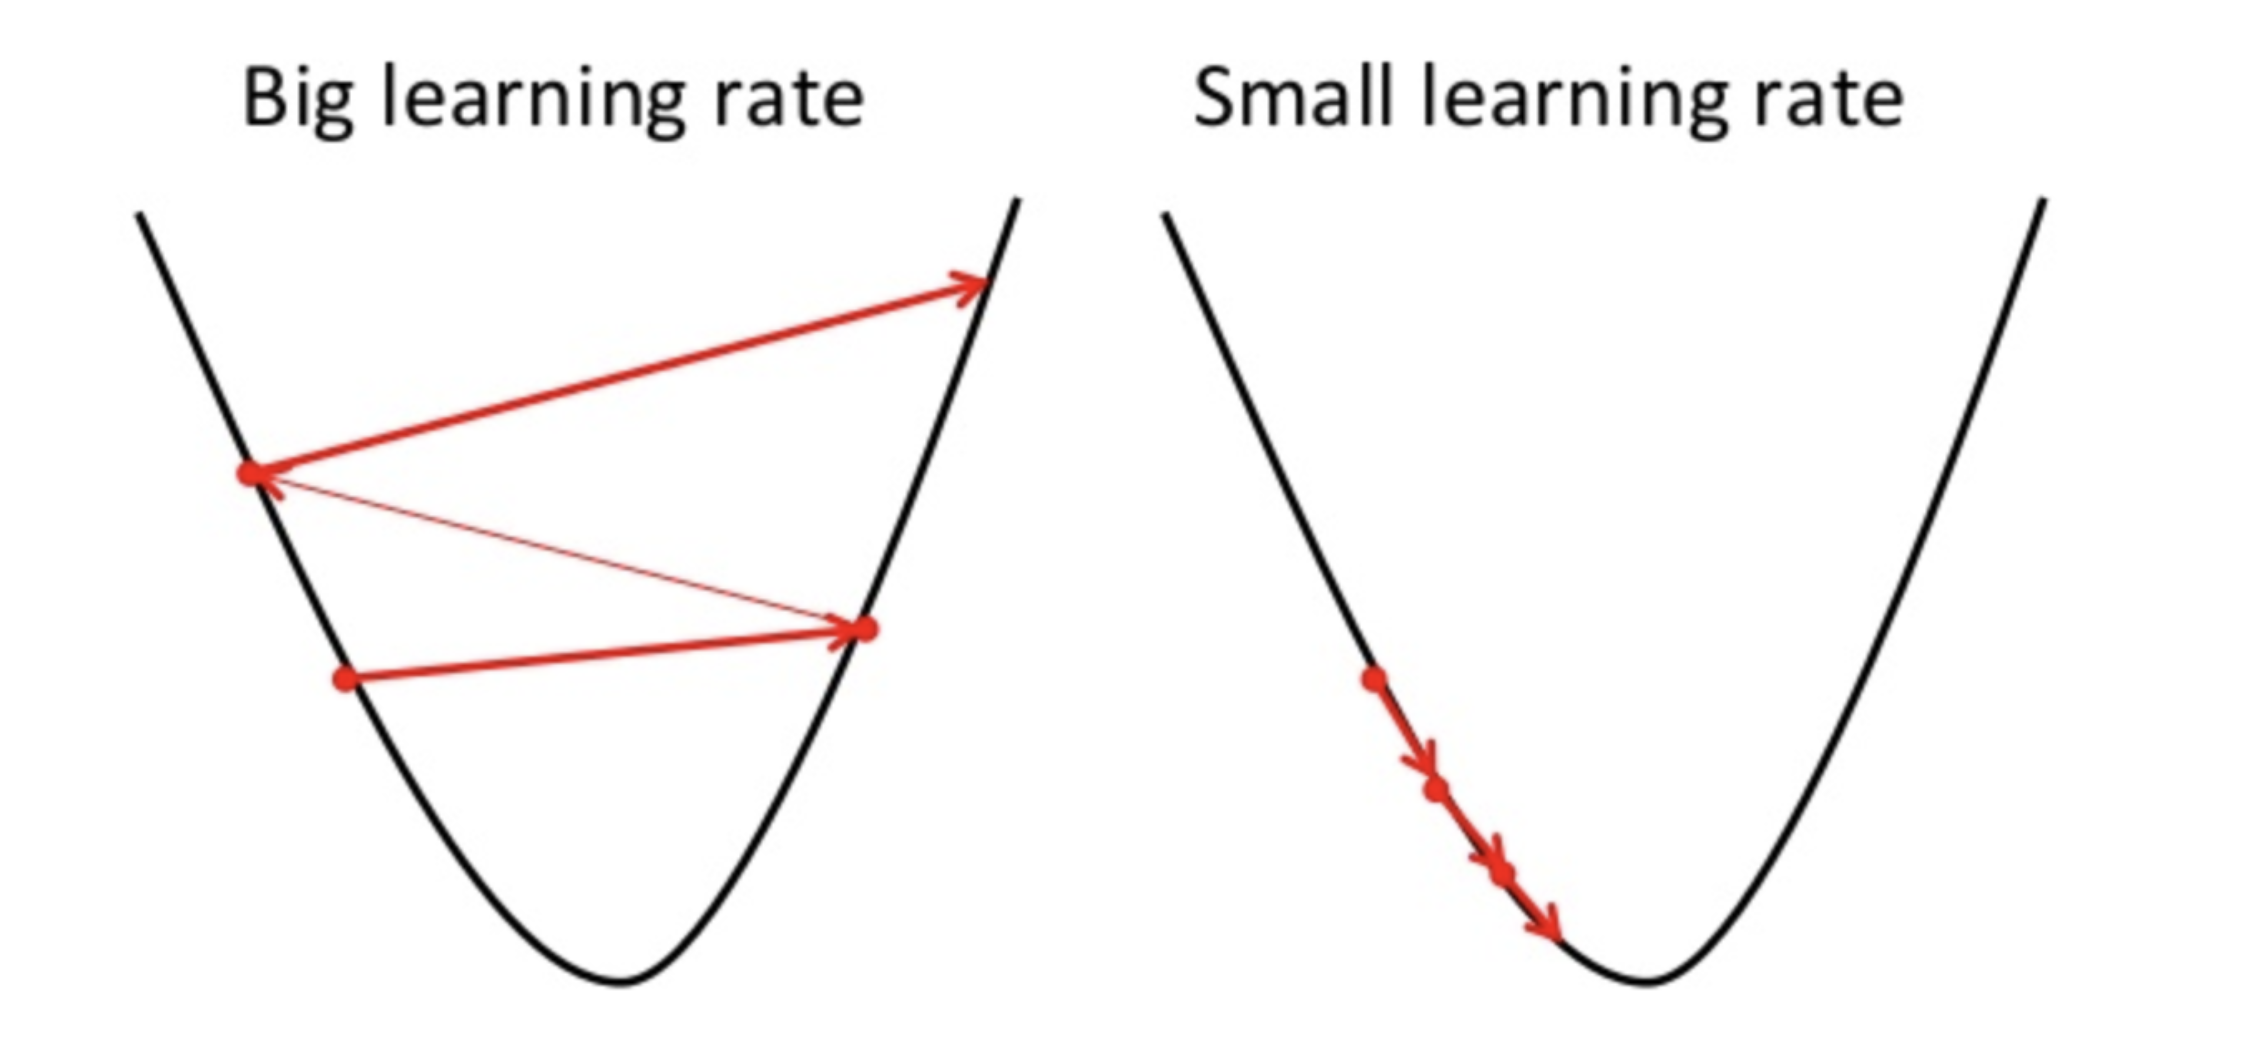



### Convexity 
* Sometimes the cost function isn't necessarily U-shaped/convex so you could settle at a local minima instead of global minima
* But for linear regression, it is always a convex function
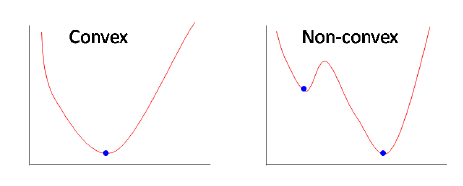

### How do we use gradient descent to update $a_{0}$ and $a_{1}$
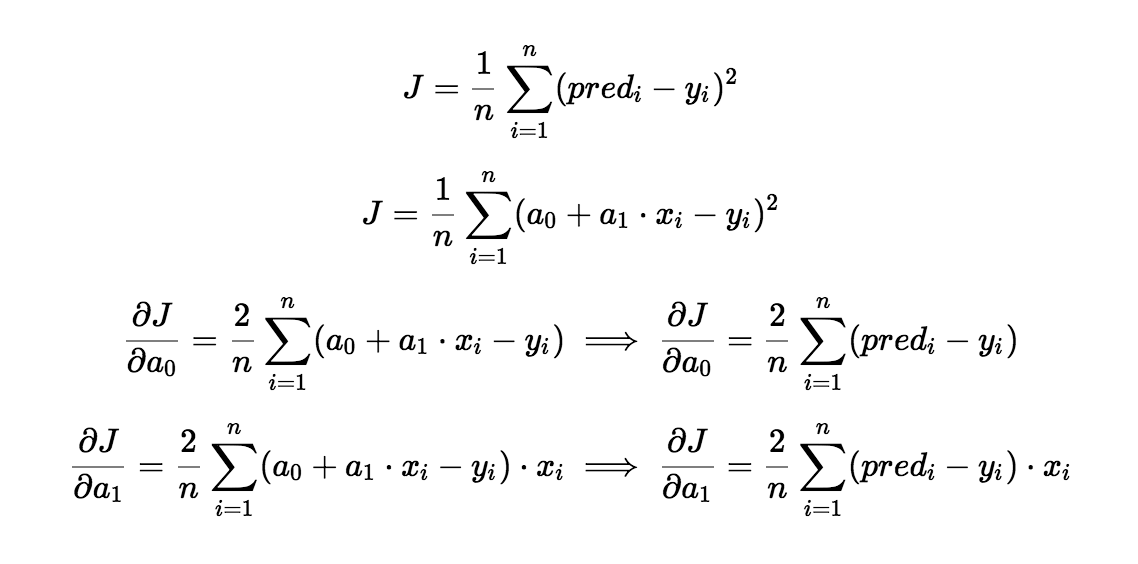


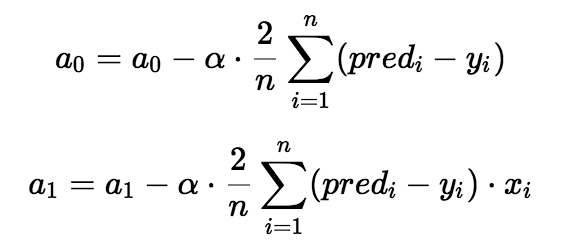

* The partial derivates are the gradients and they are used to update the values of $a_{0}$ and $a_{1}$. 
* Alpha is the learning rate which is a hyperparameter that you must specify. 
    * A smaller learning rate could get you closer to the minima but takes more time to reach the minima, a larger learning rate converges sooner but there is a chance that you could overshoot the minima.

### Let's dig deeper into gradient descent
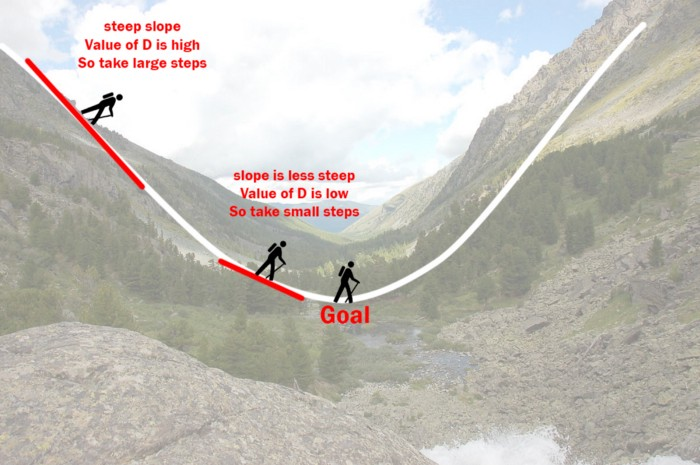

* Imagine we are a hiker and we need to cross this valley
* Initially the slope is super high so as we go down, we're taking pretty big steps (thanks gravity)
* But one you descend further into the valley, it's no longer as steep and you start taking smaller steps
* Applying gradient descent to

>Mean Squared Error Equation: 
$$
               E = \frac{1}{n}\sum_{i=0}^{n} (\bar{y_{i}}-y_{i})^2\\     
$$

* $y_{i}$  is the actual value and $\bar{y_{i}}$ is the predicted value. Substituting the value of $\bar{y_{i}}$ 

$$
            E = \frac{1}{n}\sum_{i=0}^{n} ({y_{i}}- (mx_{i} + c))^2\\ 
$$

* So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

1. Initially let m = 0 and c = 0. Let L be our learning rate. 
    * This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
$$
D_{m} =  \frac{1}{n}\sum_{i=0}^{n} 2(y_{i}-(mx_{i} + c))(-x_{i})\\
$$

$ D_{m} =  \frac{-2}{n}\sum_{i=0}^{n}(x_{i}({y_{i}}-\bar{y_{i}))$

* Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :
$ D_{c} =  \frac{-2}{n}\sum_{i=0}^{n} 2(y_{i}-(mx_{i} + c))(-x_{i}) \\ $

3. Update current value of m  and c using these equations

$$
    m = m - L * D_{m}\\
    c = c - L * D_{c}\\
$$

4. 4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.


#### In terms of hiking

* m can be considered the current position of the person. 
* D is equivalent to the steepness of the slope and L can be the speed with which he moves. 
* Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take.
* When the slope is more steep (high D value) he takes longer steps and when it is less steep (low D value), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.


# Code implementation
* We can use either the scikit learn library to import the linear regression model and use it directly or we can write or own regression model based on the equations above.
## Scikitlearn method

In [43]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [44]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [45]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


Coefficients: 
 [1.00065638]
Mean squared error: 9.43
Coefficient of determination: 0.99


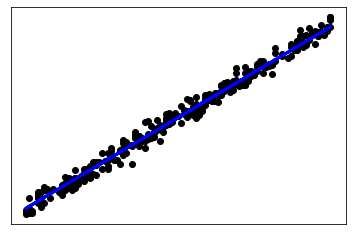

In [46]:
# assign x,y to train and test sets
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

# convert into np arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

## reshape
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# create linear regression object
linreg = linear_model.LinearRegression()

# Train the model using the training sets
linreg.fit(x_train,y_train)

#Make predictions using hte testing set
y_pred = linreg.predict(x_test)

# The coefficients
print("Coefficients: \n", linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()